In [1]:
import cv2
import matplotlib.pyplot as plt
import mahotas as mh
import numpy as np

%matplotlib inline

***Read Images by cv2***

In [12]:
import os
os.path.abspath('.')

'/home/hukim/Desktop/p/image_processing/notebooks'

In [14]:
## read
## cv2 read BGR color, but most other libraries read RGB, so convert
im = cv2.imread("../data/beach.jpg")[:,:,::-1]
print im.shape
print im.dtype
print im.min(), im.max()

(233, 350, 3)
uint8
0 255


***Show Images by plt***

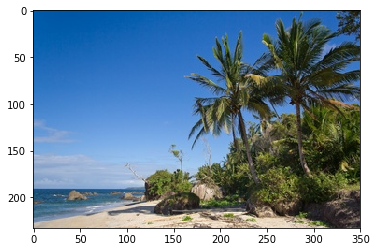

In [15]:
## display
plt.imshow(im)

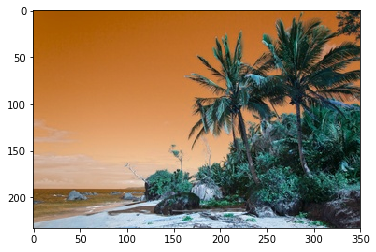

In [16]:
## otherwise ...
plt.imshow(im[:,:,::-1])

***Pixel Manipulation by numpy***

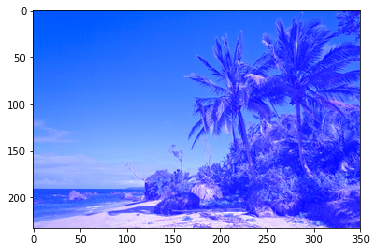

In [17]:
## manipulate pixles - cv2 store them as bgr instead of rgb
imm = im.copy()
imm[:, :, 2] = 255
plt.imshow(imm)

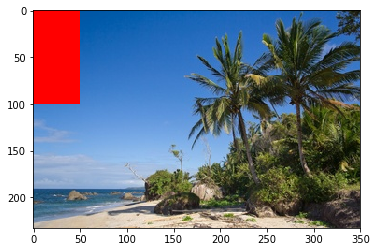

In [18]:
## manipulate pixles 
imm = im.copy()
imm[:100, :50] = (255, 0, 0) # red corner
plt.imshow(imm)

***modify image by drawing via cv2***

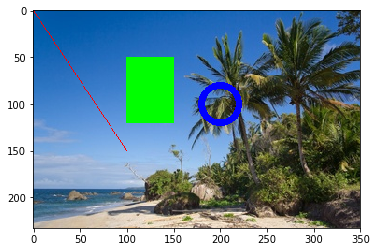

In [19]:
imm = im.copy()
## params: img, (x1, y1), (x2, y2), color (of the current img channel repr.)
cv2.line(imm, (0, 0), (100, 150), (255, 0, 0), ) #red line
cv2.circle(imm, (200, 100), 20, color = (0, 0, 255), thickness=5) #blue circle
## filled rectangle
cv2.rectangle(imm, (100, 50), (150, 120), color = (0, 255, 0), thickness = -1)
plt.imshow(imm)




***Traditional Image Processing by cv2***
- transform (translation, rotation, resizing, flipping and cropping)
- pixel arithmetics
- color channel decomposition
- most of them are using warpAffine, because some transformations need to *warp* the original image

**translation - cv.warpAffine**
- params: img, transMatrix, dsize (dest image size)
- transMatrix M should always be np.asarray([[1., 0., tx], [0., 1., ty]]), where tx and ty are offset on x and y (-x -> left, -y -> up). And it must be a float matrix
- dsize should most of time be (src_img.shape[1], src_img.shape[0]), which are WIDTH and HEIGHT of images (in image domain instead of ndarray domain)

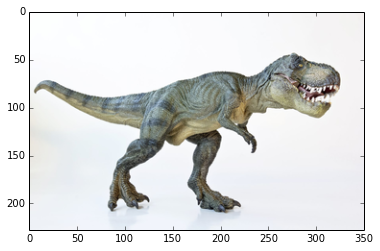

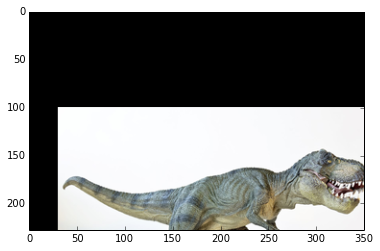

In [13]:
trex = cv2.imread("data/trex.png")[:, :, ::-1]
shifted_trex = cv2.warpAffine(trex, 
               np.array([[1, 0, 30], 
                        [0, 1, 100]], 
                dtype = np.float),
               dsize = (trex.shape[1], trex.shape[0])) # right down shift
plt.imshow(trex)
plt.figure()
plt.imshow(shifted_trex)

**rotation-cv2.warpAffine**
- get the transform matrix with `cv2.getRotationMatrix2D`
- params to `cv2.getRotationMatrix2D`: center, angle(+ -> counterclockwise), scale

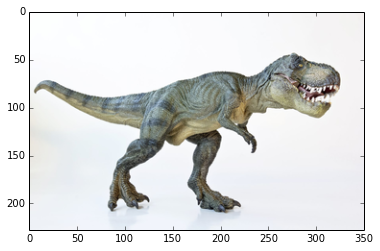

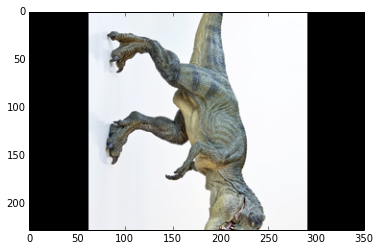

In [14]:
trex = cv2.imread("data/trex.png")[:, :, ::-1]
center = trex.shape[1]/2, trex.shape[0]/2
M = cv2.getRotationMatrix2D(center, -90, 1.)
rotated_trex = cv2.warpAffine(trex, M, (trex.shape[1], trex.shape[0]))
plt.imshow(trex)
plt.figure()
plt.imshow(rotated_trex)

**resizing - cv2.resize**
- it is aspect-ratio (width/height) constant resize 
- params to cv2.resize: img, (with, height) of dest, interpolation_method, cv2.INTER_XX, e.g., cv2.INTER_AREA
- you can also do it via rotation and warpAffine, but the effects are very different - in terms of the dimension of the resulted arrays

(228, 350, 3)


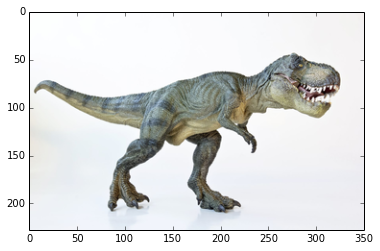

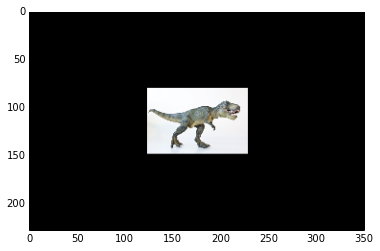

In [15]:
trex = cv2.imread("data/trex.png")[:, :, ::-1]
center = trex.shape[1]/2, trex.shape[0]/2
M = cv2.getRotationMatrix2D(center, 0, 0.3)
rotated_trex = cv2.warpAffine(trex, M, (trex.shape[1], trex.shape[0]))
plt.imshow(trex)
plt.figure()
plt.imshow(rotated_trex)
print rotated_trex.shape

(68, 105, 3)


True

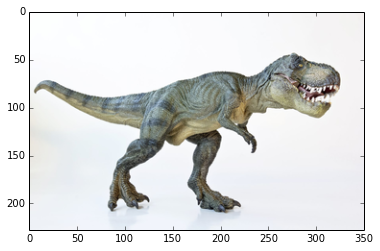

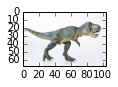

In [16]:
trex = cv2.imread("data/trex.png")[:, :, ::-1]
width, height = int(trex.shape[1]*0.3), int(trex.shape[0]*0.3)
resized_trex = cv2.resize(trex, 
                          (width, height), 
                          interpolation = cv2.INTER_AREA,)
plt.imshow(trex)
plt.figure(figsize = (1.5, 1.5))
plt.imshow(resized_trex)
print resized_trex.shape

cv2.imwrite("data/images/small_trex.png", resized_trex)

**flipping**

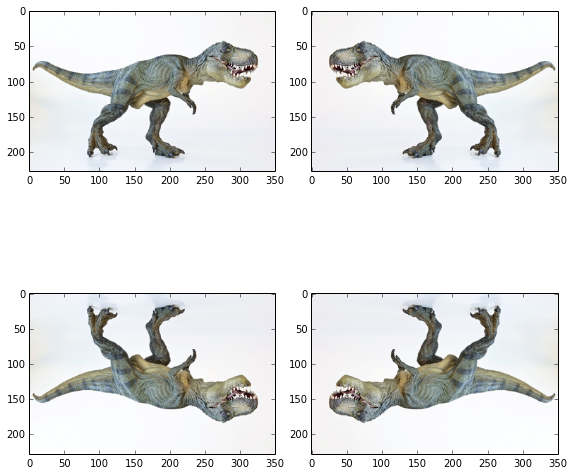

In [17]:
trex = cv2.imread("data/trex.png")[:, :, ::-1]
fig, axes = plt.subplots(2, 2, figsize = (8, 8))

fig.tight_layout()

axes = axes.ravel()
axes[0].imshow(trex)
axes[1].imshow(trex[:, ::-1, :])
axes[2].imshow(trex[::-1, :, :])
axes[3].imshow(trex[::-1, ::-1, :])

***masking by cv2.draw and cv2.bitwise_and***
- use cv2.shape to draw mask shape on a canvas
- exclusively using bitwise_and with mask parameter

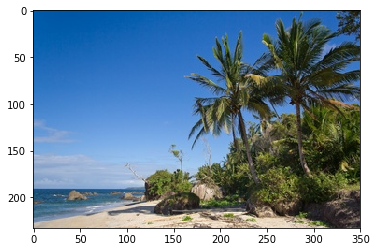

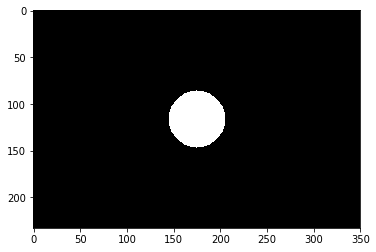

In [5]:
beach = cv2.imread("data/beach.jpg")[:,:,::-1]
plt.imshow(beach)
h, w = beach.shape[:-1]

canvas = np.zeros((h, w), dtype = np.uint8)
mask = cv2.circle(canvas, (w/2, h/2), 30, color = 255,thickness = -1)
plt.figure()
plt.imshow(mask, cmap = plt.cm.gray)

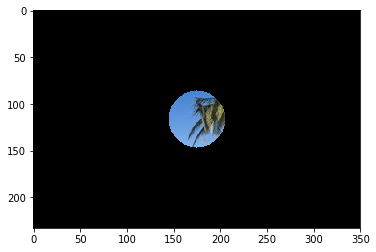

In [6]:
masked_beach = cv2.bitwise_and(beach, beach, mask = mask)
plt.figure()
plt.imshow(masked_beach)

***Split Color Channels***
- using cv2.split and cv2.merge needs to stick with (BGR) channel encoding, which might be more troublesome

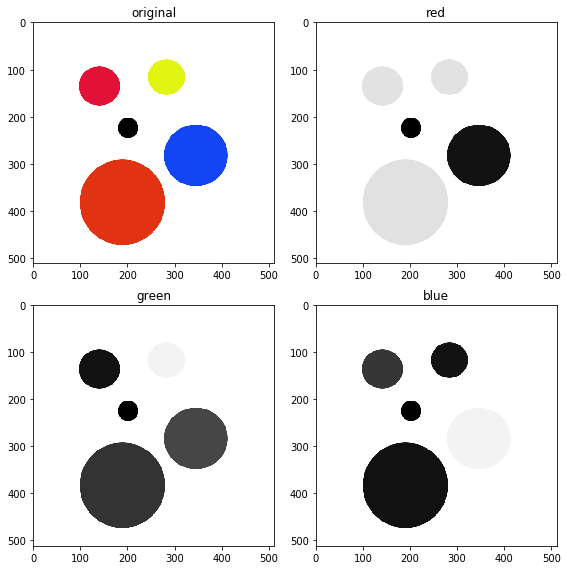

In [8]:
wave = cv2.imread("data/circles.jpg")[:,:,::-1]
fig, axes = plt.subplots(2, 2, figsize = (8, 8))
axes = axes.ravel()

fig.tight_layout()
axes[0].imshow(wave)
axes[0].set_title("original")
axes[1].imshow(wave[:, :, 0], cmap = plt.cm.gray)
axes[1].set_title("red")
axes[2].imshow(wave[:, :, 1], cmap = plt.cm.gray)
axes[2].set_title("green")
axes[3].imshow(wave[:, :, 2], cmap = plt.cm.gray)
axes[3].set_title("blue")